In [68]:
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# this helps with scrolling df
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [170]:
def plot_histogram(df, variable, count = True):
    """
    Args:
        df: data frame with categoretical variable and label named as "label"
        column: string - name of column with categorical data
        
    Returns:
        prints histogram based on label split
    
    """
    plt.tight_layout() 
    plt.figure(figsize=(8,6))
    if count:
        sns.countplot(x=variable, hue="label", data=df, palette="hls")
        plt.title("Count of label vs size bins",fontsize=20)
        plt.xlabel("Bin size",fontsize=15)
        plt.ylabel("Count",fontsize=15)
        plt.xticks(rotation=45)
        plt.legend(['non-malware','malware'],loc='upper right')
    else:
        sns.displot(x=variable, hue='label',data=df, kind = 'kde', fill = True)

    
    plt.show()

In [ ]:
sns.densplot()

In [138]:
def plot_density(df,variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50, density=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [20]:
# import JSON
df_all = pd.read_json('sample_data_6k.jsonl', lines=True)

In [28]:
df_all.label.isna().sum()

0

In [52]:
# filter out label -1
df = df_all[df_all.label!=-1].copy().reset_index()

In [57]:
df.drop(['index'],axis=1,  inplace = True)

In [58]:
df.head()

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'KERNEL32.dll': ['SetFileTime', 'CompareFileT...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...",{'ADVAPI32.dll': ['ConvertStringSecurityDescri...,[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,7520c8f9534ca818726a4feaebf49e2b,2007-02,0,,"[45369, 2560, 1233, 1542, 4234, 515, 613, 1542...","[6144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 1238, 'avlength': 12.0201938610...","{'size': 180224, 'vsize': 180224, 'has_debug':...","{'coff': {'timestamp': 892092777, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegSetValueExA', 'RegDelete...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,e435a536968941854bcec3b902c439f6,2007-02,0,,"[21315, 9641, 9332, 9358, 9598, 9220, 9146, 93...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 11166, 'avlength': 5.8078989790...","{'size': 2377730, 'vsize': 77824, 'has_debug':...","{'coff': {'timestamp': 708992537, 'machine': '...","{'entry': 'CODE', 'sections': [{'name': 'CODE'...","{'kernel32.dll': ['DeleteCriticalSection', 'Wr...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,e93049e2df82ab26f35ad0049173cb14,2007-02,0,,"[23539, 6015, 5214, 4727, 4892, 4649, 4367, 52...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 5547, 'avlength': 6.04344690823...","{'size': 1153808, 'vsize': 1167360, 'has_debug...","{'coff': {'timestamp': 938258311, 'machine': '...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegCloseKey', 'AllocateAndI...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [59]:
# extract section only
section = pd.json_normalize(df.section, record_prefix = "section")

In [93]:
# add label to set
section['label']= df.label
section['sha256'] = df.sha256

In [64]:
section['new_entry'] = section.entry.apply(lambda x: "'"+x+"'")

In [310]:
section[section.entry=='.MPRESS1' ]

,entry,sections,label,new_entry,standard_entry,number_sections,sha256,has_standard_entry,has_non_standard_entry,cnt_non_standard_sections,has_non_standard_sections_cnt,non_standard_sections_cnt,non_standard_sections_ratio
1526,.MPRESS1,"[{'name': '.MPRESS1', 'size': 309248, 'entropy...",1,'.MPRESS1',0,3,05919e71542ef5d3f6e6e852bc653a16f1f55cf7b50d11...,0,1,2.00,2.00,2.00,0.67
2759,.MPRESS1,"[{'name': '.MPRESS1', 'size': 322560, 'entropy...",1,'.MPRESS1',0,3,02be5e48e40a978222d46668f32c001ea9a06dc8316084...,0,1,2.00,2.00,2.00,0.67
2869,.MPRESS1,"[{'name': '.MPRESS1', 'size': 525312, 'entropy...",1,'.MPRESS1',0,3,d1fee1d93fd4bf096cc8b775c36e8f0ee3d06c5565b3c8...,0,1,3.00,3.00,3.00,1.00
3085,.MPRESS1,"[{'name': '.MPRESS1', 'size': 525312, 'entropy...",1,'.MPRESS1',0,3,c1cda3721258b5852755324bae20304c4de3d94b7b135b...,0,1,3.00,3.00,3.00,1.00


In [66]:
section.groupby(['new_entry','label']).count()

entry  sections
new_entry   label                 
'\tO@fw2' 1          1         1
'=\n'      1          1         1
'   '       0          5         5
            1         44        44
''          0        300       300
            1         63        63
'+eQkb'+'  1          1         1
'-/
'       1          1         1
'.'         1         10        10
'.AD8Te'    1          1         1
'.CRT2'     1          2         2
'.HEYeA'    1          1         1
'.MPRESS1'  1          4         4
'.adata'    1          1         1
'.bss'      0          1         1
'.code'     0          2         2
            1         79        79
'.crt'      1          2         2
'.crt1'     1          1         1
'.data'     0          6         6
            1          2         2
'.edata'    0          1         1
'.flat'     1          3         3
'.indata'   1          1         1
'.itext'    1          2         2
'.neolit'   0          8         8
            1          1         1
'.nsp0'     1          1         1
'.orpc'     0          1         1
'.pjz'      1          1         1
'.rdata'    0          4         4
            1          1         1
'.reloc'    0          1         1
'.rodata'   1          2         2
'.rsrc'     0         22        22
            1         11        11
'.text'    1          2         2
'.text'     0       2164      2164
            1       1315      1315
'.textbss'  0          8         8
            1          1         1
'.vmp0'     1          5         5
'.xdata'    0         48        48
'.zcode'    1          1         1
'.zxdae'    1          1         1
'/89'       0          1         1
'2sJpMTKE'  1          1         1
'3'         1          1         1
'7744'      1          1         1
'8sj(dsj2'  1          1         1
';1,Neu'  1          1         1
'ATU0'      1          1         1
'AUTO'      1          7         7
'CODE'      0        110       110
            1        167       167
'EPE0'      1          1         1
'Ei<VLm'  1          1         1
'O3t`yC`'  1          1         1
'UPX0'      0         67        67
            1        183       183
'XbWcczqo'  1          1         1
'_TEXT'     1          1         1
'code'      0          1         1
'tWgK4Qr'  1          1         1
'{PA?}!'  1          1         1

In [108]:
# https://keystrokes2016.wordpress.com/2016/06/03/pe-file-structure-sections/

standard_entries = ['.text', '.bss', '.rdata', '.data', '.rsrc', '.edata', '.idata', '.pdata', '.debug']

In [110]:
# 1 - entry is in standard entry, 0 - entry is not standard
section['has_non_standard_entry'] = np.where(section['entry'].isin(standard_entries),0,1)

In [111]:
# how many sections is in the file
section['number_sections'] = section['sections'].apply(lambda x: len(x))

<Figure size 432x288 with 0 Axes>

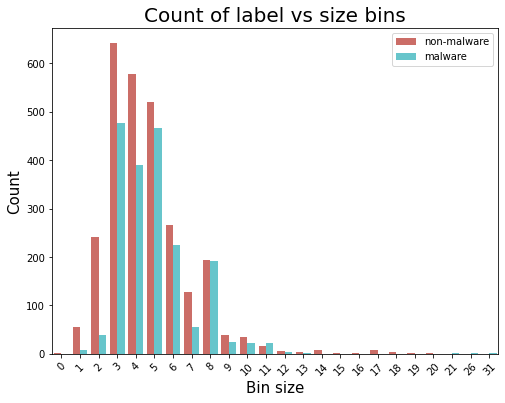

In [81]:
plot_histogram(section,'number_sections')

<Figure size 432x288 with 0 Axes>

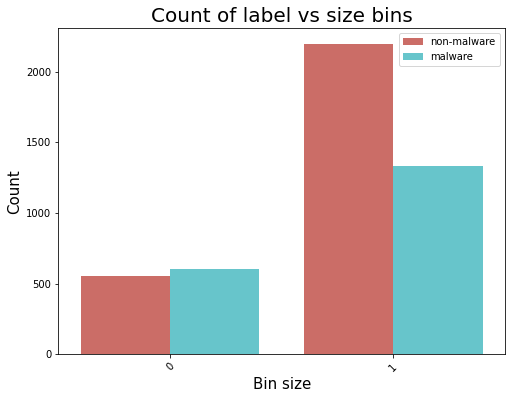

In [112]:
plot_histogram(section,'standard_entry')

In [311]:
pd.DataFrame(section['sections'].loc[1526])

,name,size,entropy,vsize,props
0,.MPRESS1,309248,8.00,909312,"[CNT_CODE, MEM_EXECUTE, CNT_INITIALIZED_DATA, ..."
1,.MPRESS2,4096,6.02,3656,"[CNT_CODE, MEM_EXECUTE, CNT_INITIALIZED_DATA, ..."
2,.rsrc,75264,6.04,74936,"[CNT_INITIALIZED_DATA, MEM_READ, MEM_WRITE]"


In [122]:
def count_non_standard_sections(x, standard_entries = standard_entries):
    """
    Args: 
        x: column  with list of dictionaries
        standard_entries: list of sections considered as standard entries
    Returns: 
        cnt: number of non standard sections
    
    """
    small_df = pd.DataFrame(x)
    
    if small_df.shape[0]==0:
        return(np.NaN)
    else:
        small_df['has_non_standard_sections'] = np.where(small_df.name.isin(standard_entries),0,1)
        cnt = small_df.has_non_standard_sections.sum()
        return cnt
    

In [134]:
# shows how many non standard section is in the file
section['non_standard_sections_cnt'] = section.sections.apply(lambda x: count_non_standard_sections(x))

In [137]:
# non_standard_ratio will be percentage of suspicious sections in total number of sections
section['non_standard_sections_ratio'] = section['has_non_standard_sections_cnt'] / section['number_sections'] 

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

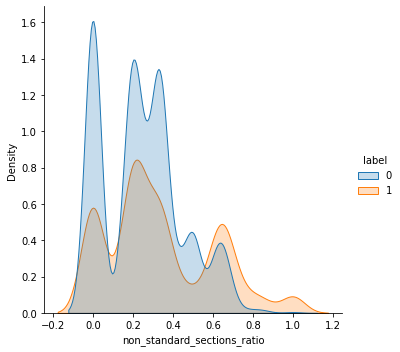

In [171]:
plot_histogram(section,'non_standard_sections_ratio', False)